Q2. 

Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

About the Data

*  This data is created via survery. However the data was imbalanced and records were synthasized using WEKA to simulate additional responses.
The synthasized data fits the distribution of the data but generates floats (ratio data) where ordinal and integer data were the original values in the survey.
The target variable is comprised of the variables height and weight. Height and weight are used to classisfy a persons BMI. The BMI measure was then used to classify each observation.

In [2]:
df = pd.read_csv('F:\Python_DS_Assignment\ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.shape

(2111, 17)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df.duplicated().sum()

24

In [15]:
#drop duplicate records 
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
#numerical and categorical features 
numerical_features=[cols for cols in df.columns if df[cols].dtype!='O']
print(numerical_features)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [18]:
categorical_fetures=[cols for cols in df.columns if df[cols].dtype=='O']
print(categorical_fetures)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


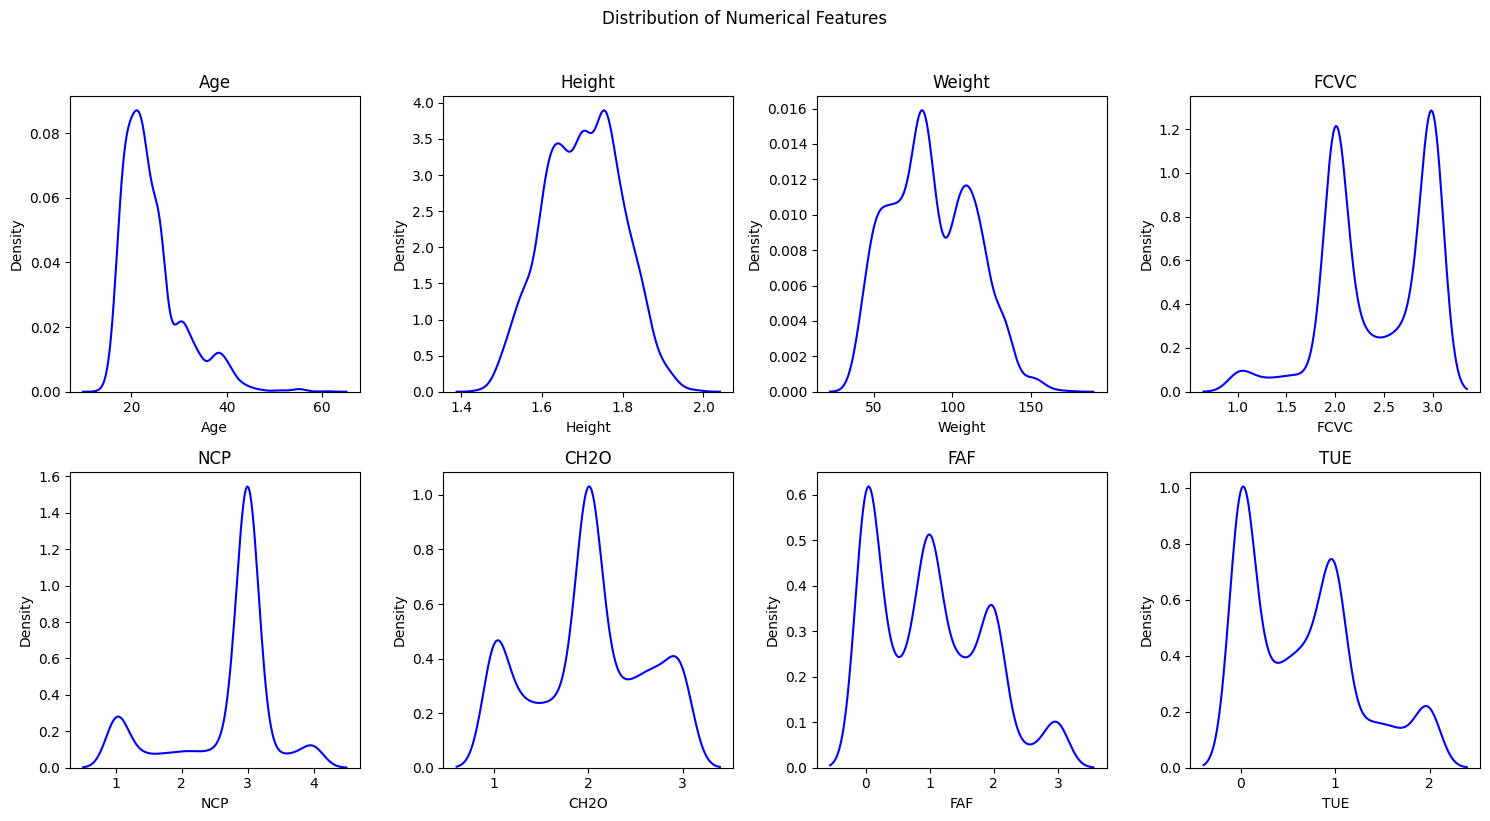

In [23]:
#Checking distribution of Numerical features 
# Assuming 'df' is your DataFrame and the columns you want to visualize are numeric

# Create subplots for each numeric feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle("Distribution of Numerical Features", y=1.02)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Plot histograms for each numeric feature
for i, column in enumerate(numerical_features):
    sns.kdeplot(df[column],ax=axes[i], color='blue')
    axes[i].set_title(column)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

From visual it clears numerical features are not normally distributed

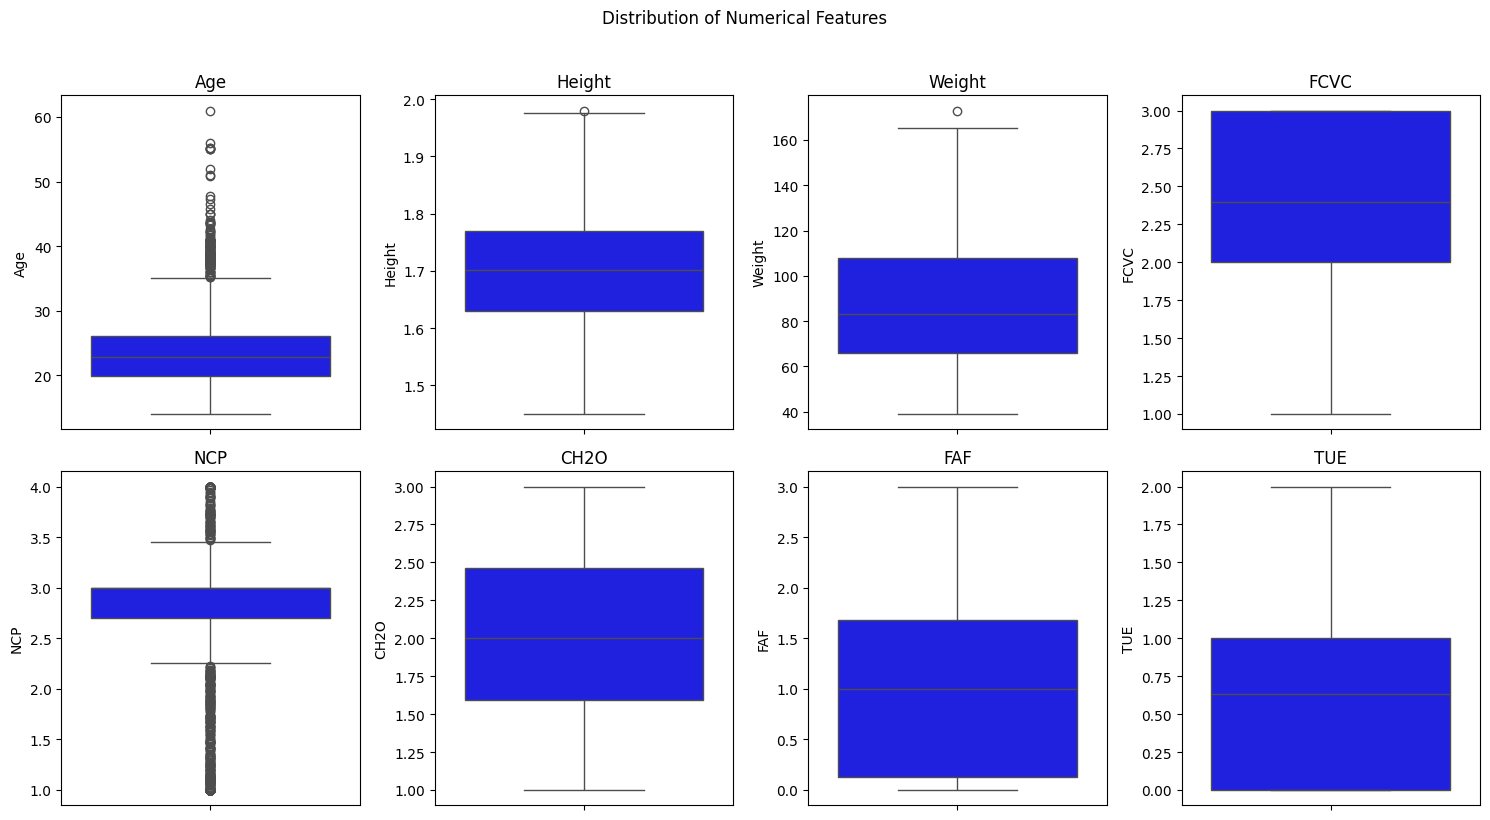

In [24]:
# Create subplots for each numeric feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle("Distribution of Numerical Features", y=1.02)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Plot histograms for each numeric feature
for i, column in enumerate(numerical_features):
    sns.boxplot(df[column],ax=axes[i], color='blue')
    axes[i].set_title(column)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

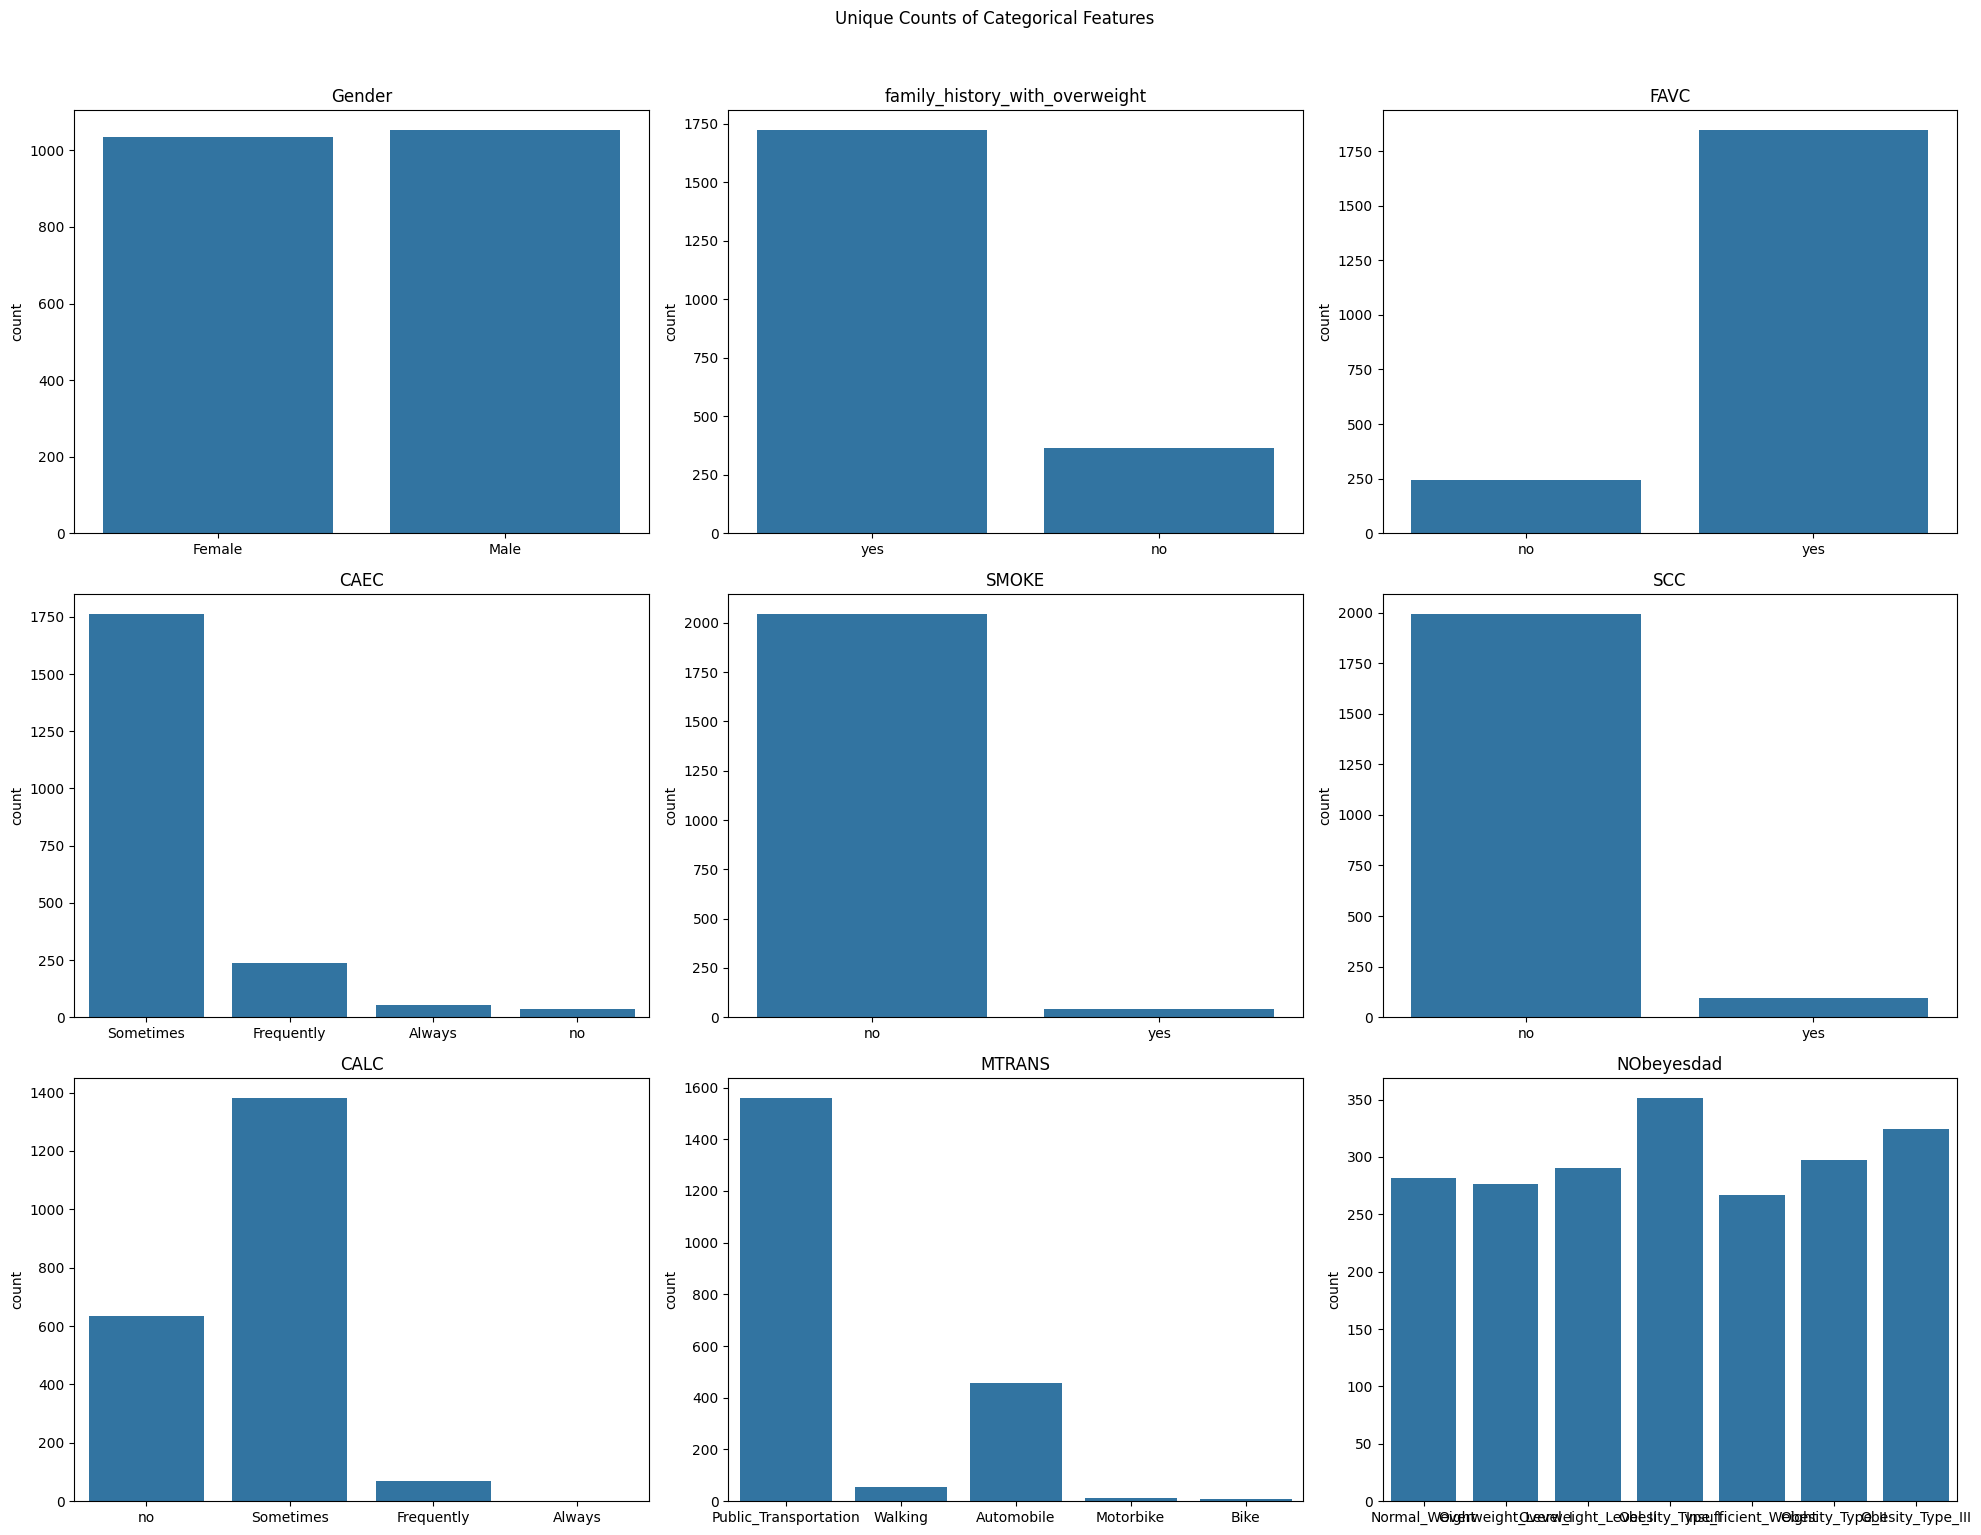

In [52]:
# Create subplots for each categorical feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle("Unique Counts of Categorical Features", y=1.02)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Plot bar plots for each categorical feature
for i, column in enumerate(categorical_fetures):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(None)  # Remove x-axis label for better readability

# Adjust layout for better readability
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

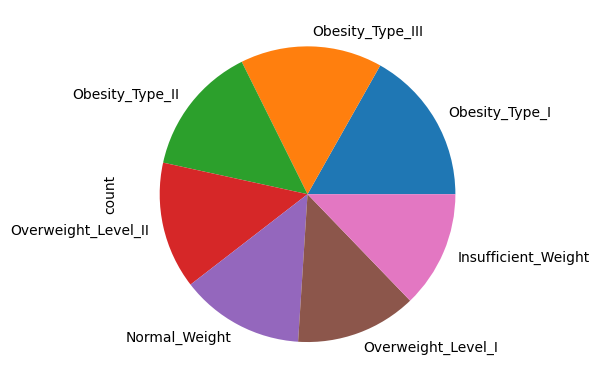

In [57]:
df['NObeyesdad'].value_counts().plot.pie()

<Axes: xlabel='NObeyesdad'>

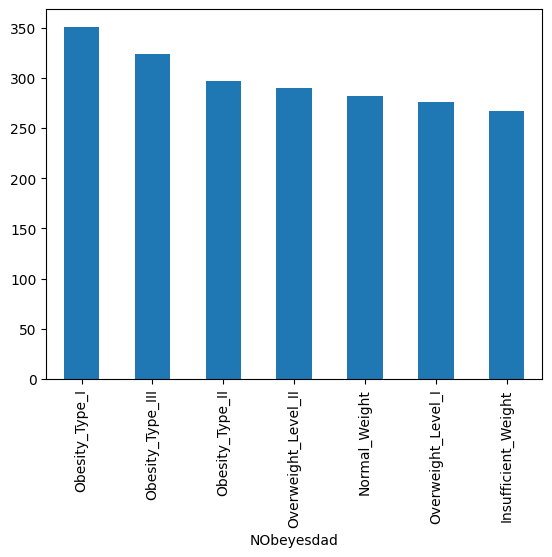

In [87]:
df['NObeyesdad'].value_counts().plot.bar()

Our target variable is not balanced

In [62]:
df_copy=df.copy()

In [66]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_fetures:
    df_copy[i] = lable.fit_transform(df_copy[i])

<Axes: >

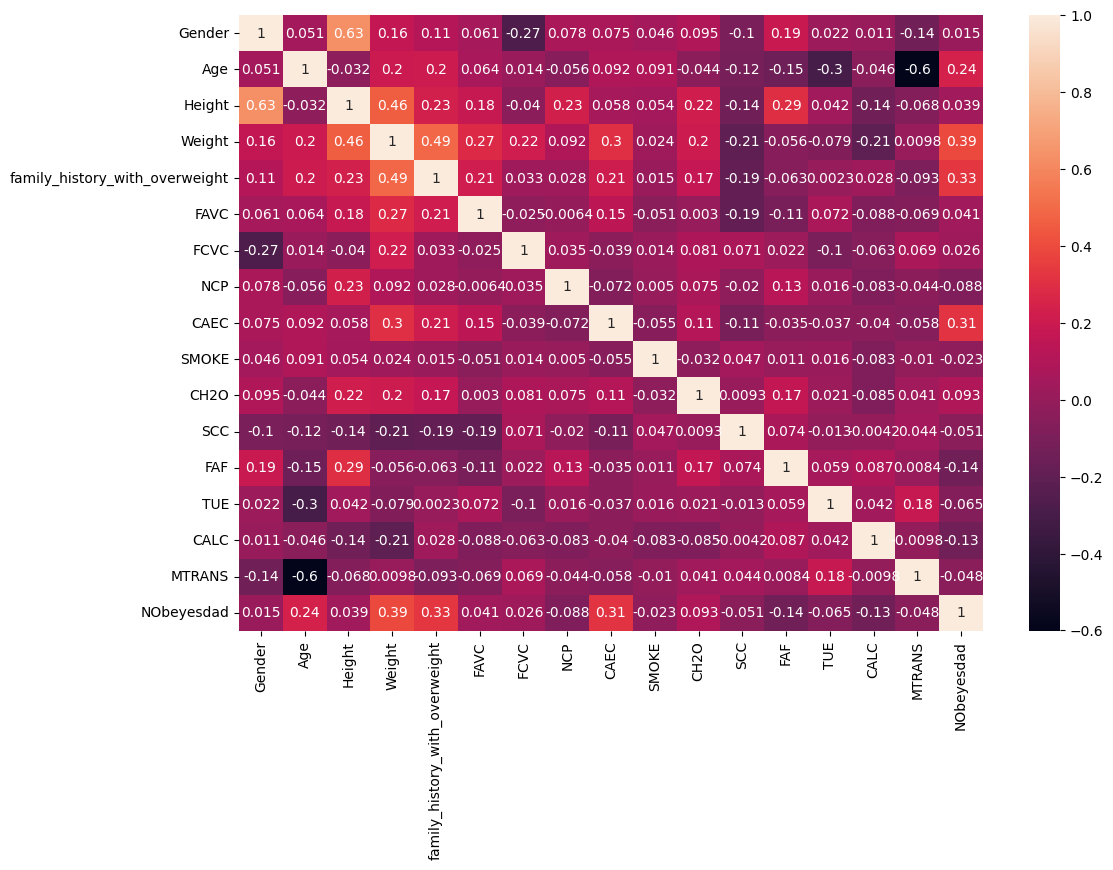

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(),annot=True)

In [71]:
y= df['NObeyesdad']

In [72]:
X=df.drop('NObeyesdad',axis=1)

In [75]:
cat_features=X.select_dtypes(include='object').columns
print(cat_features)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [76]:
num_features=X.select_dtypes(exclude='object').columns
print(num_features)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [79]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [80]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("scaler",RobustScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
       ('encoder',OneHotEncoder(drop='first',handle_unknown='ignore'))
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,num_features),
    ("cato_pipline",cato_pipline,cat_features)
])

In [81]:
preprocessor

ColumnTransformer(transformers=[('num_pipline',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                ('cato_pipline',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [85]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [98]:
def run_models(X_train:pd.DataFrame,y_train:pd.DataFrame,X_test:pd.DataFrame,y_tes:pd.DataFrame):
    models=[
            ('random_forest',RandomForestClassifier()),
            ('logistic_regression',LogisticRegression(max_iter=1000)),
            ('svc',SVC()),
            ('decision_tree_classifier',DecisionTreeClassifier()),
            ('KNN',KNeighborsClassifier())
        ]
    for name ,model in models:
        clf=model.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        accuracy=accuracy_score(y_pred,y_test)
        
        
    # getting classfication report 
     # output
        print(name + ':')   
        print('Accuracy',accuracy)     
        print("---------------------------------------------------------------")      
        print("\nClassification Report:\n", classification_report(y_test, y_pred))      
        print("------------------------------------------------------------- \n")
           

In [99]:
run_models(X_train,y_train,X_test,y_test)

random_forest:
Accuracy 0.9521531100478469
---------------------------------------------------------------

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.90      0.93        59
      Normal_Weight       0.81      0.95      0.87        61
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.98      0.87      0.92        55
Overweight_Level_II       0.94      0.96      0.95        49

           accuracy                           0.95       418
          macro avg       0.96      0.95      0.95       418
       weighted avg       0.96      0.95      0.95       418

------------------------------------------------------------- 

logistic_regression:
Accuracy 0.8325358851674641
---------------------------------------------------------------

Classification R